# Project description

Working with the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms, and historical data on game sales are avaiable from open sources. Its needed to identify patterns that determine wether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.

# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
ds = pd.read_csv('../games.csv')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
ds.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11300,Pachitte Chonmage Tatsujin 13: Pachinko Hissat...,PS2,2007.0,Misc,0.00,0.00,0.08,0.00,NaN,NaN,NaN
6295,NickToons: Racing,GBA,2002.0,Racing,0.19,0.07,0.00,0.00,78.0,tbd,E
13497,The King of Fighters 2002: Unlimited Match,PS2,2009.0,Fighting,0.00,0.00,0.04,0.00,NaN,NaN,NaN
8201,Dark Souls II,PC,2014.0,Role-Playing,0.08,0.08,0.00,0.01,91.0,7.1,T
8515,Dancing With The Stars,PS2,2007.0,Misc,0.08,0.06,0.00,0.02,NaN,tbd,E10+
6755,Create,Wii,2010.0,Action,0.20,0.02,0.00,0.02,62.0,tbd,E
2839,Persona Q: Shadow of the Labyrinth,3DS,2014.0,Role-Playing,0.34,0.07,0.27,0.04,83.0,8.1,M
9650,Peter Jacobsen's Golden Tee Golf,PS,2000.0,Sports,0.07,0.05,0.00,0.01,NaN,NaN,NaN
9542,The Stronghold Collection,PC,2009.0,Strategy,0.03,0.08,0.00,0.02,NaN,tbd,T
13555,Grand Slam,PS,1997.0,Misc,0.02,0.02,0.00,0.00,NaN,NaN,NaN


In [5]:
ds.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Preparing the Data

Setting up a copy of the data to work on that

In [6]:
df = ds.copy()

## Making the column names lowercase

In [7]:
columns = [a.lower() for a in df.keys()]
df.columns = columns

In [8]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Changing the columns datatype to the correct type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())

In [11]:
df['year_of_release'] = df['year_of_release'].astype(int)

Changing the year of release column since it makes no sense for it to be a float, and the user score column since all user scores seem to range from 0 to 10. The rest of the columns seem to be of the correct type.

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
df[(df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)].shape


(34, 11)

There seems to be that only 34 games from 2016 have a user score still to be determined. Im thinking they are so because of being recent releases at the moment the data was collected and not enough users had yet given their score. Although years before also have a similar amount of tbd games, only the ones from 2016 will be filled as the mean of the column. The rest will be treated as 0 when dealing with nan values further ahead

In [14]:
not_enough_data_mask = (df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)
df.loc[not_enough_data_mask, 'user_score'] = 11

In [15]:
unpopular_mask = (df['user_score'] == 'tbd') & (df['year_of_release'] < 2016)
df.loc[unpopular_mask, 'user_score'] = 0

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', 11, '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

The user score value tbd (To Be Determined) will be considered as 0. It seems that the low popularity of those games had them unranked by the users. For the 2016 games the user rank will be the average of the column

In [18]:
df.loc[df['user_score']>10, 'user_score'] = df[(df['user_score']<10) & (df['user_score']>0)]['user_score'].median()

## Checking for duplicates

In [19]:
df[df.duplicated(keep='last')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Dealing with NaN

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### Name column

In [21]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Dropping the NaN values since those two rows are highly uninformative

In [22]:
df = df.dropna(subset=['name'])

Checking again for NaN

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [24]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,10014.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,68.967679,5.425814
std,5.828405,0.813565,0.503359,0.308871,0.186742,13.938165,3.306888
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,2.800000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


### Critic score column

In [25]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())

C:\Users\Tirso\AppData\Local\Temp\ipykernel_19844\3082889487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


All the NaN in the column were filled with the median

### User score column

In [27]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,10014.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,70.010531,5.425814
std,5.828405,0.813565,0.503359,0.308871,0.186742,9.778073,3.306888
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,71.000000,2.800000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,71.000000,8.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [28]:
df['user_score'] = df['user_score'].fillna(df['user_score'].median())

C:\Users\Tirso\AppData\Local\Temp\ipykernel_19844\1931243227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].fillna(df['user_score'].median())


All the NaN in the column were filled with the median

### Rating column

In [29]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [30]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


C:\Users\Tirso\AppData\Local\Temp\ipykernel_19844\1026040397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


All the NaN values in the rating column were filled with the mode of the column

## Feature Engineering

### Creating the total sales column

In [32]:
df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

C:\Users\Tirso\AppData\Local\Temp\ipykernel_19844\1258182972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']


# Analyzing the Data

([<matplotlib.axis.XTick at 0x1b13d5ea150>,
 [Text(1980, 0, '1980'),
  Text(1983, 0, '1983'),
  Text(1986, 0, '1986'),
  Text(1989, 0, '1989'),
  Text(1992, 0, '1992'),
  Text(1995, 0, '1995'),
  Text(1998, 0, '1998'),
  Text(2001, 0, '2001'),
  Text(2004, 0, '2004'),
  Text(2007, 0, '2007'),
  Text(2010, 0, '2010'),
  Text(2013, 0, '2013'),
  Text(2016, 0, '2016')])

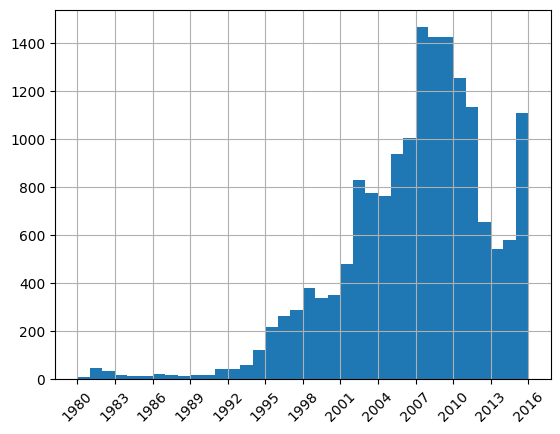

In [108]:
df['year_of_release'].hist(bins=36)
plt.xticks(range(df['year_of_release'].min(), df['year_of_release'].max() + 1, 3), rotation = 45)

The data for the release years seems mostly left skewed, meaning that most games were released after the 2000s. The highest peak can be seen after 2010, which preceded a downfall and then it seems to be going for another rise.

In [43]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(4).reset_index()
top_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51


The top 4 best selling platforms are the PS2, Xbox360, PS3 and the Wii.

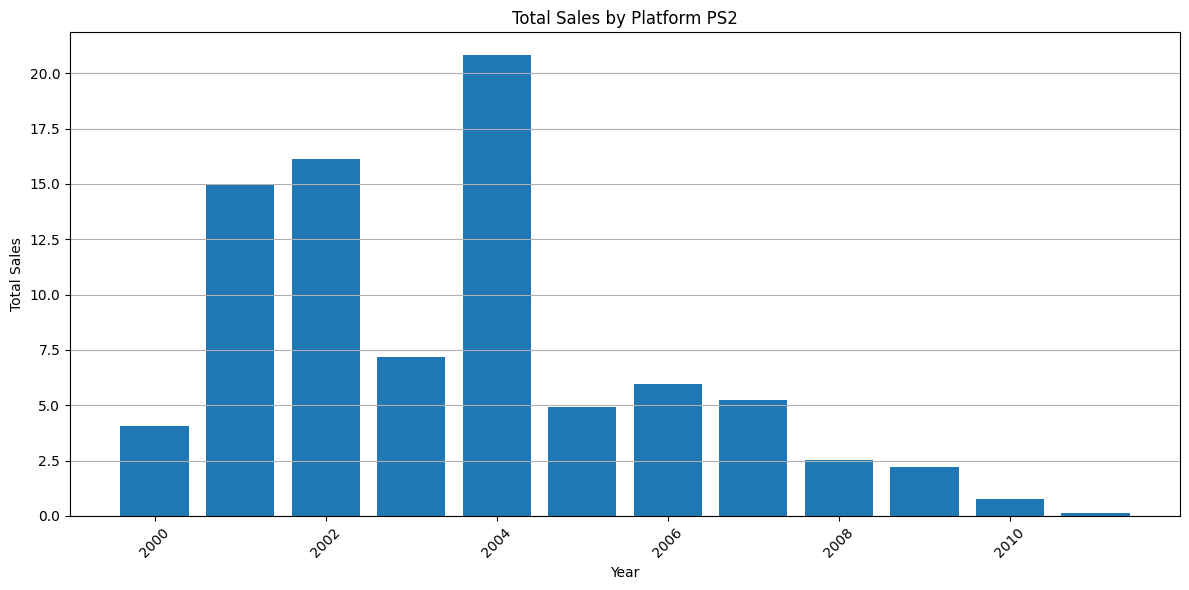

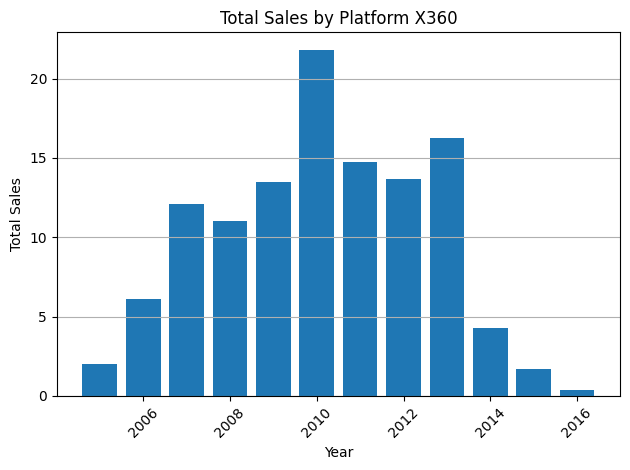

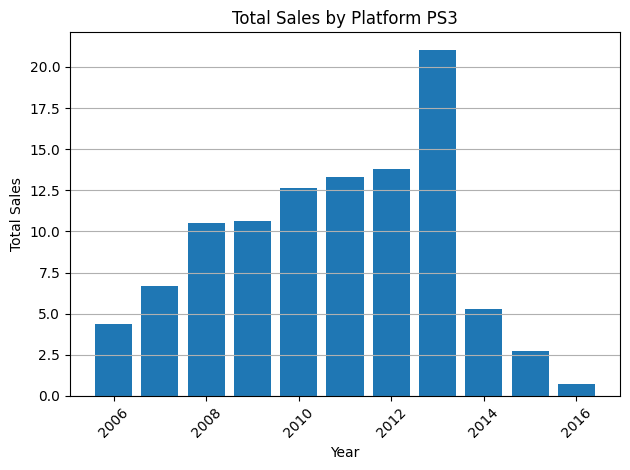

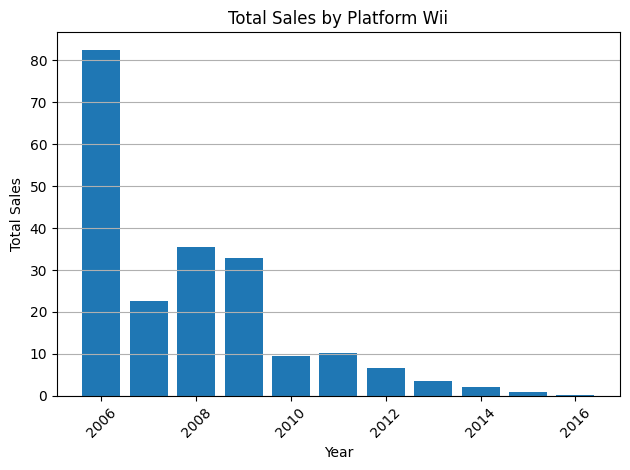

In [52]:
plt.figure(figsize=(12, 6))

for platform in top_platforms['platform']:
    platform_sales = df[df['platform'] == platform]

    plt.bar(platform_sales['year_of_release'], platform_sales['total_sales'], label=platform)
    plt.title(f'Total Sales by Platform {platform}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()





We can see how the Wii had a huge amount of sales on its release year, then declined a lot yet keeping a considerable amount for the next 4 years but then lowering the amount of sales. Different from the PS3 that had its brightest spot several years after its release, mantaining a similar amount of sales each year. A similar case of the PS3 is the one of the Xbox360.

<font color='red'>I have no idea why the PS2 is the highest seller. Would appreciate some help here.</font>


([<matplotlib.axis.XTick at 0x1b1354ca690>,
 [Text(1980, 0, '1980'),
  Text(1981, 0, '1981'),
  Text(1982, 0, '1982'),
  Text(1983, 0, '1983'),
  Text(1984, 0, '1984'),
  Text(1985, 0, '1985'),
  Text(1986, 0, '1986'),
  Text(1987, 0, '1987'),
  Text(1988, 0, '1988'),
  Text(1989, 0, '1989'),
  Text(1990, 0, '1990'),
  Text(1991, 0, '1991'),
  Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016')])

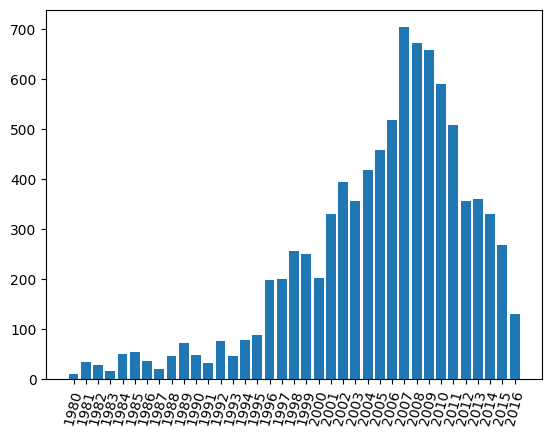

In [51]:
yearly_sales = df.groupby('year_of_release')['total_sales'].sum()
plt.bar(yearly_sales.reset_index()['year_of_release'], yearly_sales.reset_index()['total_sales'])
plt.xticks(range(yearly_sales.index[0], yearly_sales.index[-1]+1), rotation=75)

The sales per year seem to follow the same pattern as the releases, except for the last rise in releases which was not preceeded by an increase in sales, yet it may be due to lack of data being the last year data was recorded.

In [113]:
platform_lifespans = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']
platform_lifespans = platform_lifespans[platform_lifespans['max']!=2016]
platform_lifespans

,min,max,lifespan
platform,,,
2600,1980,2007,27
3DO,1994,1995,1
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2007,19
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4
GG,1992,1992,0


In [114]:
platform_lifespans['lifespan'].median()

7.5

We usually see that platforms have a 7.5 year lifespan. We disregard the platforms still active in 2016 for that analysis. Before doing so the platform lifespan was 9 years.

In [60]:
all_selling_platforms = df.groupby('platform')['total_sales'].sum().reset_index()
all_selling_platforms['total_sales'].mean()

287.5254838709677

In [66]:
popular_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
popular_platforms = popular_platforms[popular_platforms>all_selling_platforms['total_sales'].mean()]
popular_platforms.reset_index()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05


In [124]:
popular_platform_lifespans = df[df['platform'].isin(popular_platforms.reset_index()['platform'])].groupby('platform')['year_of_release'].agg(['min', 'max'])
popular_platform_lifespans['lifespan'] = popular_platform_lifespans['max'] - popular_platform_lifespans['min']
popular_platform_lifespans = popular_platform_lifespans[popular_platform_lifespans['max']!=2016]
popular_platform_lifespans

,min,max,lifespan
platform,,,
DS,1985,2013,28
GBA,2000,2007,7
PS,1994,2007,13
PS2,2000,2011,11
PSP,2004,2015,11


In [126]:
popular_platform_lifespans['lifespan'].median()

11.0

We also see that popular platforms had a lifespan of 11 years.

In [67]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,6.9,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,6.9,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,6.9,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,6.9,E,0.01


In [93]:
df[(df['year_of_release'] == 2016) & (df['platform'].isin(popular_platforms.reset_index()['platform'])) & (df['total_sales']==0.01)]['platform'].unique()


array(['PS4', 'PS3'], dtype=object)

Platforms that use to sell above average but had close to no sales in 2016 were the PS4 and the PS3.

## Taking a filtered df for the model

Since platforms have a usual 9 year lifespan i should select only the platforms that came up after 2008 but due to lack of platforms im also gonna select the ones from 2008 and 2007.

In [134]:
still_active_platforms = df.groupby('platform')['year_of_release'].min().sort_values(ascending=False).reset_index()
still_active_platforms = still_active_platforms[still_active_platforms['year_of_release']>=2006]['platform']
df_filtered = df[df['platform'].isin(still_active_platforms)]

In [135]:
df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS3,939.65
1,Wii,907.51
2,PS4,314.14
3,3DS,259.00
4,XOne,159.32
5,WiiU,82.19
6,PSV,54.07


For this period out of the selected platforms the PS3 is leading in sales, even thou it had a bad year last year.

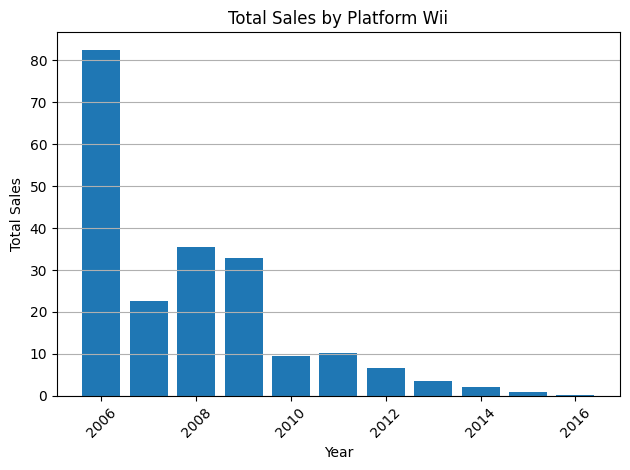

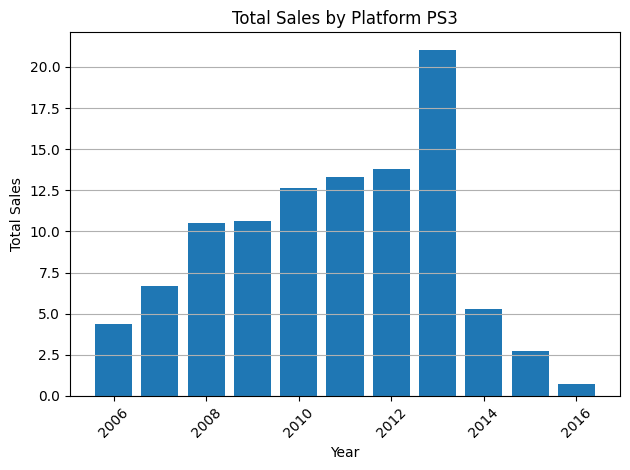

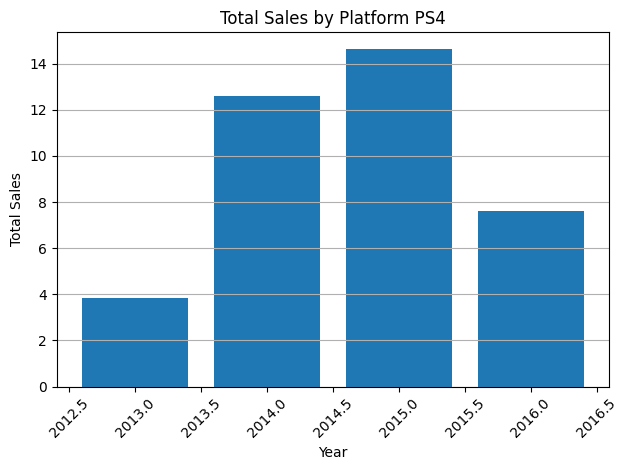

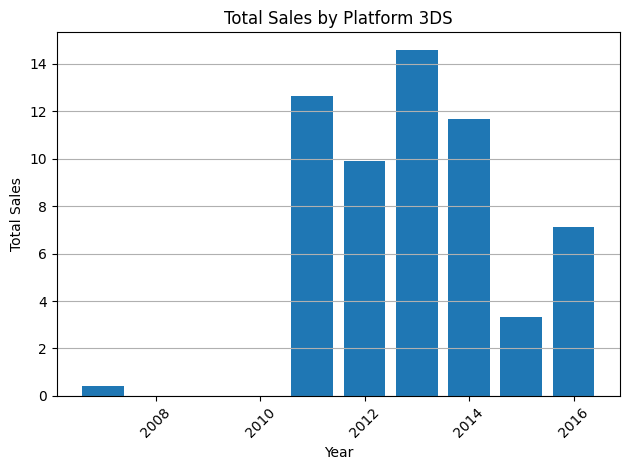

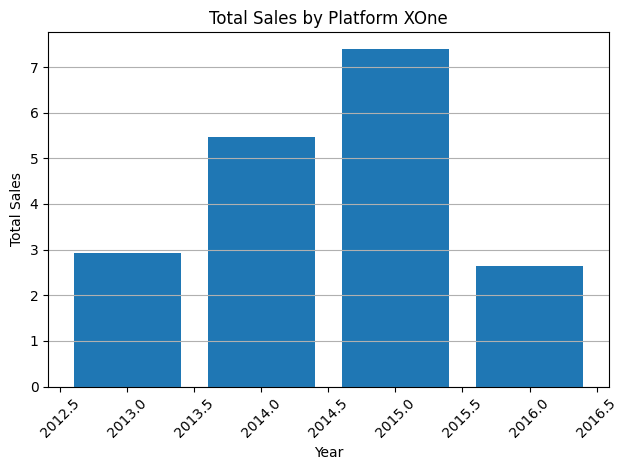

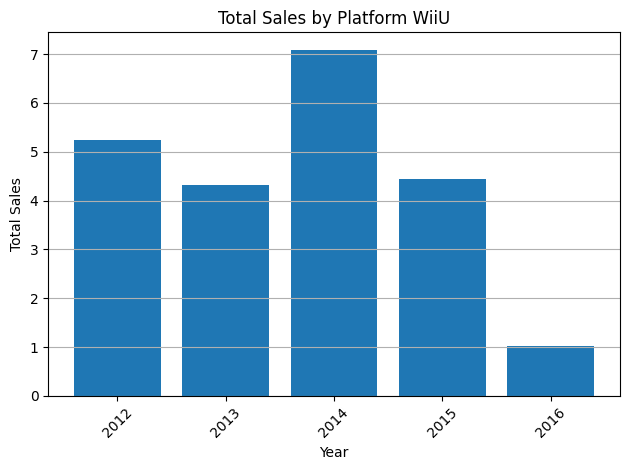

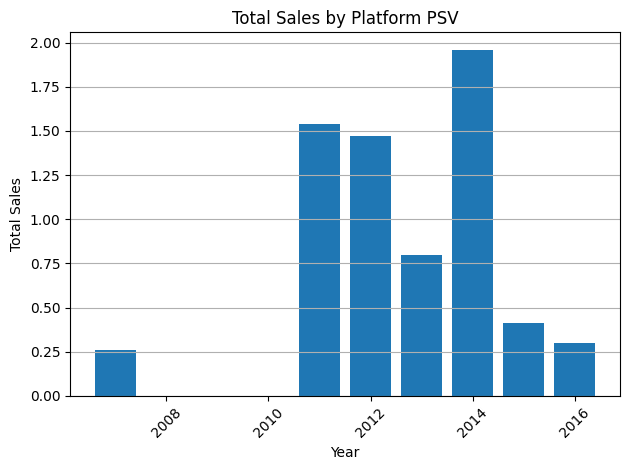

In [137]:
for platform in df_filtered['platform'].unique():
    platform_sales = df_filtered[df_filtered['platform'] == platform]

    plt.bar(platform_sales['year_of_release'], platform_sales['total_sales'], label=platform)
    plt.title(f'Total Sales by Platform {platform}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


Most of the platforms seem to have been past their prime and going donwhill except for the XboxOne who can still make a comeback after a bad year, the 3DS seems to be recovering after a bad year and could see a spike next year, and the PS4 is holding still a little bit strong and can also see a spike in sales.

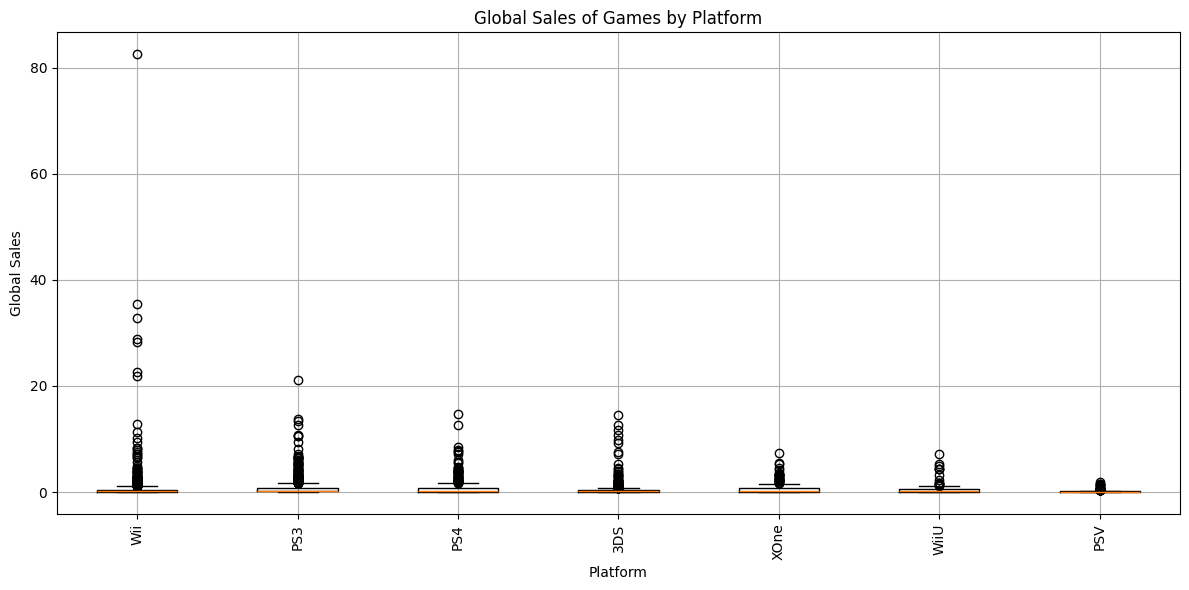

In [138]:
plt.figure(figsize=(12, 6))
plt.boxplot([df_filtered[df_filtered['platform'] == platform]['total_sales'] for platform in df_filtered['platform'].unique()], labels=df_filtered['platform'].unique())
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=90) 
plt.grid(True)
plt.tight_layout()
plt.show()